In [24]:
## Utility and basics
import pandas as pd 
import numpy as np          # numerical computations, arrays, math functions
import datetime as dt       # date and time manipulation
import re                   # regular expressions for string pattern matching
import json                 # working with JSON data

## Charting and visualisation
import matplotlib.pyplot as plt   # low-level plotting
import seaborn as sns            # statistical plots built on matplotlib
import plotly

## For analysis
import scipy.stats as stats      # hypothesis testing, distributions, etc.

In [ ]:
## Test with Chatgpt to extract the files to start working on them
import subprocess
import os
import pandas as pd
import sqlite3

# === Settings ===
rar_filename = "conjunto de dados - student.rar"           # Your .rar file
extract_dir = "extracted_files"     # Folder to extract into

# === Step 1: Extract using unar ===
os.makedirs(extract_dir, exist_ok=True)

try:
    result = subprocess.run(
        ['unar', '-o', extract_dir, rar_filename],
        check=True,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    print("✅ Extraction successful!")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("❌ Extraction failed:")
    print(e.stderr)
    exit()

# === Step 2: Auto-detect and load supported files ===
def load_file(filepath):
    if filepath.endswith('.csv'):
        return pd.read_csv(filepath)
    elif filepath.endswith('.pkl') or filepath.endswith('.pickle'):
        return pd.read_pickle(filepath)
    elif filepath.endswith('.parquet'):
        return pd.read_parquet(filepath)
    elif filepath.endswith('.db') or filepath.endswith('.sqlite'):
        conn = sqlite3.connect(filepath)
        tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
        if tables.empty:
            conn.close()
            return None
        table_name = tables.iloc[0, 0]
        df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
        conn.close()
        return df
    return None

# === Step 3: Recursively find and load files ===
loaded_dfs = {}
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        full_path = os.path.join(root, file)
        df = load_file(full_path)
        if df is not None:
            print(f"\n📄 Loaded: {file}")
            print(df.head())
            loaded_dfs[file] = df

if not loaded_dfs:
    print("⚠️ No supported data files found in the archive.")


✅ Extraction successful!
conjunto de dados - student.rar: RAR 5
  conjunto de dados - student/atributos dos conjuntos de dados.txt  (3780 B)... OK.
  conjunto de dados - student/student-mat.csv  (56993 B)... OK.
  conjunto de dados - student/student-por.csv  (93220 B)... OK.
  conjunto de dados - student/  (dir)... OK.
Successfully extracted to "extracted_files/conjunto de dados - student-1".


📄 Loaded: student-por.csv
  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                

In [28]:
df = pd.read_csv("extracted_files/conjunto de dados - student/student-por.csv", sep=";")
  # or "student-mat.csv"

print(df.shape)
print(df.columns)
print(df.head())
print(df.describe())
print(df.dtypes)

(649, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        

In [17]:
print(df.isnull().sum())

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots show inside the notebook
%matplotlib inline  

# Optional: set a visual theme
sns.set(style="whitegrid")

# Plot the histogram of the 'G3' (final grade) column
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title("Distribuição das Notas Finais (G3)")
plt.xlabel("Nota Final")
plt.ylabel("Número de Estudantes")
plt.show()

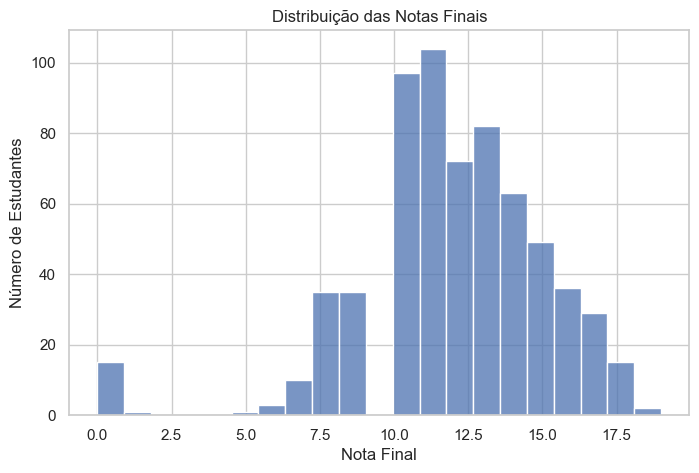

In [30]:
%matplotlib inline
plt.figure(figsize=(8, 5))
sns.histplot(df["G3"])
plt.title("Distribuição das Notas Finais")
plt.xlabel("Nota Final")
plt.ylabel("Número de Estudantes")
plt.show()

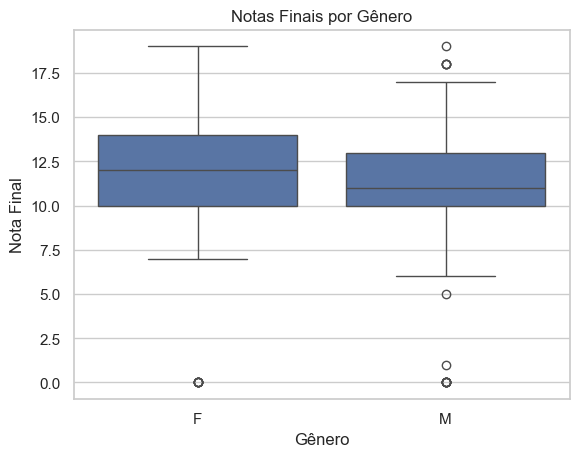

In [31]:
sns.boxplot(x="sex", y="G3", data=df)
plt.title("Notas Finais por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Nota Final")
plt.show()


In [32]:
df[['G1', 'G2', 'G3']].describe()


,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000
